<a href="https://colab.research.google.com/github/marinba2200/DL_test/blob/main/1223_6_RNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Library and load data

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, SimpleRNN, GRU, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


### First, ANN model

In [ ]:
# Build the model
model_ann = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model_ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
r_ann = model_ann.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10) #60,000/32=1875

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4898 - accuracy: 0.8564 - val_loss: 0.1384 - val_accuracy: 0.9590
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1486 - accuracy: 0.9560 - val_loss: 0.1024 - val_accuracy: 0.9671
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1071 - accuracy: 0.9669 - val_loss: 0.0876 - val_accuracy: 0.9725
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0838 - accuracy: 0.9742 - val_loss: 0.0759 - val_accuracy: 0.9760
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0726 - accuracy: 0.9770 - val_loss: 0.0759 - val_accuracy: 0.9768
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0616 - accuracy: 0.9803 - val_loss: 0.0715 - val_accuracy: 0.9791
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0544 - accuracy: 0.9821 - val_loss: 0.0720 - val_accuracy:

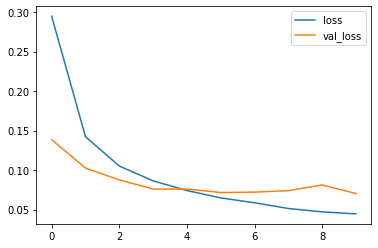

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r_ann.history['loss'], label='loss')
plt.plot(r_ann.history['val_loss'], label='val_loss')
plt.legend()

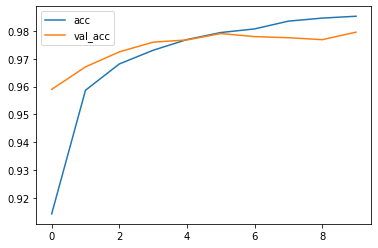

In [ ]:
# Plot accuracy per iteration
plt.plot(r_ann.history['accuracy'], label='acc')
plt.plot(r_ann.history['val_accuracy'], label='val_acc')
plt.legend()

### Second, CNN model

In [ ]:
# the data is only 2D!
# convolution expects height x width x color
x_train_c = np.expand_dims(x_train, -1)
x_test_c = np.expand_dims(x_test, -1)
print(x_train_c.shape)

(60000, 28, 28, 1)


In [ ]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [ ]:
# Build the model using the functional API
i = Input(shape=x_train_c[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model_cnn = Model(i, x)

In [ ]:
# Compile and fit
# Note: make sure you are using the GPU for this!
model_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r_cnn = model_cnn.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3778 - accuracy: 0.8811 - val_loss: 0.0653 - val_accuracy: 0.9802
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0674 - accuracy: 0.9790 - val_loss: 0.0426 - val_accuracy: 0.9857
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0527 - accuracy: 0.9837 - val_loss: 0.0399 - val_accuracy: 0.9865
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0400 - accuracy: 0.9870 - val_loss: 0.0475 - val_accuracy: 0.9863
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0296 - accuracy: 0.9907 - val_loss: 0.0401 - val_accuracy: 0.9869
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0249 - accuracy: 0.9918 - val_loss: 0.0359 - val_accuracy: 0.9889
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0218 - accuracy: 0.9931 - val_loss: 0.0504 - val_accuracy:

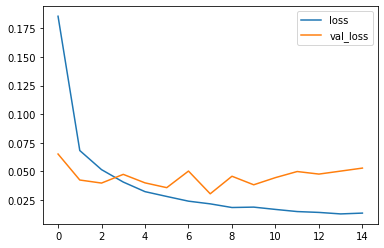

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r_cnn.history['loss'], label='loss')
plt.plot(r_cnn.history['val_loss'], label='val_loss')
plt.legend()

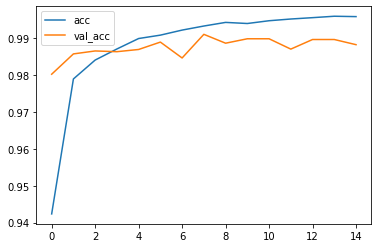

In [ ]:
# Plot accuracy per iteration
plt.plot(r_cnn.history['accuracy'], label='acc')
plt.plot(r_cnn.history['val_accuracy'], label='val_acc')
plt.legend()

### Third, RNN model

In [ ]:
# Build the model
i = Input(shape=x_train[0].shape)
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)

model_rnn = Model(i, x)

In [ ]:
# Compile and train
model_rnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r_rnn = model_rnn.fit(x_train_c, y_train, validation_data=(x_test_c, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.6583 - accuracy: 0.7816 - val_loss: 0.1300 - val_accuracy: 0.9593
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1166 - accuracy: 0.9644 - val_loss: 0.0915 - val_accuracy: 0.9725
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0786 - accuracy: 0.9761 - val_loss: 0.0694 - val_accuracy: 0.9787
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0555 - accuracy: 0.9832 - val_loss: 0.0603 - val_accuracy: 0.9830
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0453 - accuracy: 0.9865 - val_loss: 0.0512 - val_accuracy: 0.9835
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0365 - accuracy: 0.9889 - val_loss: 0.0549 - val_accuracy: 0.9840
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0302 - accuracy: 0.9907 - val_loss: 0.0421 - val_accuracy:

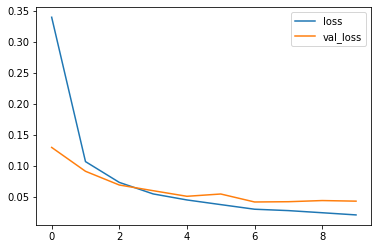

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r_rnn.history['loss'], label='loss')
plt.plot(r_rnn.history['val_loss'], label='val_loss')
plt.legend()

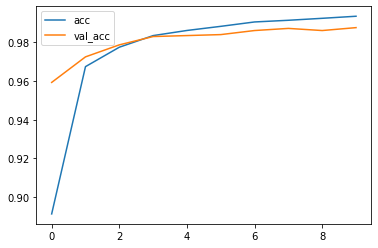

In [ ]:
# Plot accuracy per iteration
plt.plot(r_rnn.history['accuracy'], label='acc')
plt.plot(r_rnn.history['val_accuracy'], label='val_acc')
plt.legend()